## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>

В данном проекте предстоит решить задачу машинного обучения, направленную на автоматизацию бизнес процессов. Будет построена модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные будут использованы для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Во время выполнения проекта будет реализована работа с несколькими источниками данных, генерация признаков, разведывательный анализ и визуализация данных, отбор признаков и построение моделей машинного обучения.

## 2. Знакомство с данными, базовый анализ и расширение данных

In [1]:
# Необходимые библиотеки для работы.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загрузка и вывод датасета.
taxi_data = pd.read_csv("data/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Загрузив датасет, можно увидеть, что у нас есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. Условно, признаки можно разделить на несколько групп.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах

### Задание 2.1
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [3]:
# Задание 2.1

# Исследуем данные на наличие пропусков. По полученным данным пропусков не выявлено.
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


### Задание 2.2
Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S').

Определите временные рамки (без учета времени), за которые представлены данные.

In [4]:
# Задание 2.2

# Перевод признака pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда 
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

# Перевод признака dropoff_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда 
taxi_data['dropoff_datetime'] = pd.to_datetime(taxi_data['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

# Определение временных рамок (без учета времени), за которые представлены данные. Для этого выведем описательную статистику по датам и времени.
taxi_data['pickup_datetime'].describe()

count                 1458644
unique                1380222
top       2016-03-04 08:07:34
freq                        5
first     2016-01-01 00:00:17
last      2016-06-30 23:59:39
Name: pickup_datetime, dtype: object

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?

In [5]:
# Задание 2.3

# Признак продолжительности поездки в секундах.
taxi_data['trip_duration'] = taxi_data['dropoff_datetime'] - taxi_data['pickup_datetime']
taxi_data['trip_duration'] = round(taxi_data['trip_duration'].dt.total_seconds())

# Выведем количественные показатели времени, количество таксопарков и максимальное количество пассажиров.
print('Количество уникальных таксопарков:',taxi_data['vendor_id'].nunique())
print('Максимальное количество пассажиров:',taxi_data['passenger_count'].max())
print('Среднее время поездки (в секундах):',round(taxi_data['trip_duration'].mean()))
print('Мединное время поездки (в секундах):',round(taxi_data['trip_duration'].median()))
print('Минимальное время поездки (в секундах):',round(taxi_data['trip_duration'].min()))
print('Максимальное время поездки (в секундах):',round(taxi_data['trip_duration'].max()))

# Количественные показатели всех признаков.
round(taxi_data.describe())

Количество уникальных таксопарков: 2
Максимальное количество пассажиров: 9
Среднее время поездки (в секундах): 959
Мединное время поездки (в секундах): 662
Минимальное время поездки (в секундах): 1
Максимальное время поездки (в секундах): 3526282


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.0,1458644.0,1458644.0,1458644.0,1458644.0,1458644.0,1458644.0
mean,2.0,2.0,-74.0,41.0,-74.0,41.0,959.0
std,0.0,1.0,0.0,0.0,0.0,0.0,5237.0
min,1.0,0.0,-122.0,34.0,-122.0,32.0,1.0
25%,1.0,1.0,-74.0,41.0,-74.0,41.0,397.0
50%,2.0,1.0,-74.0,41.0,-74.0,41.0,662.0
75%,2.0,2.0,-74.0,41.0,-74.0,41.0,1075.0
max,2.0,9.0,-61.0,52.0,-61.0,44.0,3526282.0


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [6]:
# Функция для добавление новых признаков.
def add_datetime_features(taxi_data):
    taxi_data['pickup_date'] = taxi_data['pickup_datetime'].dt.date
    taxi_data['pickup_hour'] = taxi_data['pickup_datetime'].dt.hour
    taxi_data['pickup_day_of_week'] = taxi_data['pickup_datetime'].dt.dayofweek
    return taxi_data

# Применение add_datetime_features для генерации временных признаков.
taxi_data = add_datetime_features(taxi_data)

print('Количество поездок по субботам:', taxi_data[taxi_data['pickup_day_of_week'] == 5].shape[0])
print('Среднее количество поездок в день:', round(taxi_data.shape[0] / taxi_data['pickup_date'].nunique()))

Количество поездок по субботам: 220868
Среднее количество поездок в день: 8015


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.

In [7]:
# Таблица праздничных дней.
holiday_data = pd.read_csv("data/holiday_data.csv", sep=';')

# Создание бинарного признака поездки в праздничный день (1 - да, 0 - нет).
def add_holiday_features(taxi_data, holiday_data):
    holiday_list = list(holiday_data['date'])
    taxi_data['pickup_holiday'] = taxi_data['pickup_date'].apply(lambda x: 1 if str(x) in holiday_list else 0)
    return taxi_data

# Применение add_holiday_features() для признака с поездками в праздничные дни.
taxi_data = add_holiday_features(taxi_data, holiday_data)

mask_data = taxi_data['pickup_holiday'] == 1
print('Медианная длительность поездки в праздничные дни:', round(taxi_data[mask_data]['trip_duration'].median()))

Медианная длительность поездки в праздничные дни: 585


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [8]:
# Загрузим таблицу с данными из OSRM.
osrm_data = pd.read_csv('data/osrm_data_train.csv')

# Функция add_osrm_features().
def add_osrm_features(taxi_data, osrm_data):
    osrm_data = osrm_data[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]
    taxi_data = taxi_data.merge(osrm_data, on='id', how='left')
    return taxi_data

# Добавляем в таблицу признаки с данными из OSRM для поездок. 
taxi_data = add_osrm_features(taxi_data, osrm_data)

# Разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM.
difference_time = taxi_data['trip_duration'].median() - taxi_data['total_travel_time'].median()
print('Разница длительности поездки в секундах:', round(difference_time))

print('Количество пропусков в признаке total_distance:', taxi_data['total_distance'].isnull().sum())
print('Количество пропусков в признаке total_travel_time:', taxi_data['total_travel_time'].isnull().sum())
print('Количество пропусков в признаке number_of_steps:', taxi_data['number_of_steps'].isnull().sum())

# Выведем строки в таблице, где присутствуют найденные пропуски для подсчета количества этих строк.
display(taxi_data[taxi_data['total_distance'].isnull()])
# В таблице оказалась одна строка, где все найденные пропуски принадлежат одной строке.

Разница длительности поездки в секундах: 372
Количество пропусков в признаке total_distance: 1
Количество пропусков в признаке total_travel_time: 1
Количество пропусков в признаке number_of_steps: 1


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps
1133561,id3008062,2,2016-06-23 19:04:09,2016-06-23 19:04:35,1,-73.787537,40.64241,-73.787811,40.642109,N,26.0,2016-06-23,19,3,0,NaN,NaN,NaN


In [9]:
# функция для вычисления расстояния Хаверсина (в километрах).
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

# функция для вычисления угла направления движения (в градусах).
def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.

In [10]:
def add_geographical_features(taxi_data):
    taxi_data['haversine_distance'] = get_haversine_distance(
        lat1 = taxi_data['pickup_latitude'],
        lng1 = taxi_data['pickup_longitude'],
        lat2 = taxi_data['dropoff_latitude'],
        lng2 = taxi_data['dropoff_longitude']
    )
    taxi_data['direction'] = get_angle_direction(
        lat1 = taxi_data['pickup_latitude'],
        lng1 = taxi_data['pickup_longitude'],
        lat2 = taxi_data['dropoff_latitude'],
        lng2 = taxi_data['dropoff_longitude']
    )
    return taxi_data

taxi_data = add_geographical_features(taxi_data)
print('Медианное расстояние Хаверсина в километрах:', round(taxi_data['haversine_distance'].median(), 2))

Медианное расстояние Хаверсина в километрах: 2.09


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?

In [11]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))

# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

# Создаем признак geo_cluster - географический кластер.
def add_cluster_features(taxi_data, cluster):
    taxi_data['geo_cluster'] = cluster.predict(taxi_data[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']])
    return taxi_data

# Передаем в функцию датасет и алгоритм кластеризации и получим признак geo_cluster - географический кластер.
taxi_data = add_cluster_features(taxi_data, kmeans)

# Выводим получившиеся кластеры, отсортированные по количеству поездок.
print(taxi_data['geo_cluster'].value_counts().sort_values())

2         2
8         5
6        18
1      7233
3     27022
7     41171
5     43619
4    359233
9    383874
0    596467
Name: geo_cluster, dtype: int64


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.

In [12]:
# Набор данных, содержащий информацию о погодных условиях в Нью-Йорке.
weather_data = pd.read_csv('data/weather_data.csv')

def add_weather_features(taxi_data, weather_data):
    # Сгенерируем признаки с датой и временем.
    weather_data['time'] = pd.to_datetime(weather_data['time'], format='%Y-%m-%d %H:%M:%S')
    weather_data['date'] = weather_data['time'].dt.date
    weather_data['hour'] = weather_data['time'].dt.hour
    # Оставляем только нужные признаки.
    weather_data = weather_data[['temperature', 'visibility', 'wind speed', 'precip', 'events', 'date', 'hour']]
    # Объединение таблиц по дате и времени.
    taxi_merge = taxi_data.merge(
        weather_data,
        how='left',
        left_on = ['pickup_date', 'pickup_hour'],
        right_on = ['date', 'hour'])
    taxi_merge = taxi_merge.drop(['date', 'hour'], axis = 1)
    return taxi_merge

# Применяем функцию для объединения таблиц.
taxi_merge = add_weather_features(taxi_data, weather_data)

# Количество поездок в снежную погоду.
print('Количество поездок в снежную погоду:', taxi_merge[taxi_merge['events'] == 'Snow'].shape[0])

# Вычисляем количество пропусков.
none_count = 100 - (taxi_merge.dropna().shape[0] / taxi_merge.shape[0]) * 100
print('Пропуски в столбцах составляют', round(none_count, 2), '%')

Количество поездок в снежную погоду: 13126
Пропуски в столбцах составляют 0.82 %


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.

In [13]:
# Функция для заполнения пропущенных данных в столбцах.
def fill_null_weather_data(taxi_merge):
    # Список с нужными признаками.
    taxi_cols = ['temperature', 'visibility', 'wind speed', 'precip']
    # Заполнение указанных признаков медианным значением.
    for col in taxi_cols:
        taxi_merge[col] = taxi_merge[col].fillna(taxi_merge.groupby('pickup_date')[col].transform('median'))
    # Пропуски в признаке 'events' заменяем на 'None'.
    taxi_merge['events'] = taxi_merge['events'].fillna('None')
    # Пропуски в столбцах с информацией из OSRM заполняем медианным значением.
    values = {
        'total_distance': taxi_merge['total_distance'].median(),
        'total_travel_time': taxi_merge['total_travel_time'].median(),
        'number_of_steps': taxi_merge['number_of_steps'].median()
    }
    taxi_new = taxi_merge.fillna(values)
    return taxi_new

# Применяем функцию к таблице с данными о поездках.
taxi_merge = fill_null_weather_data(taxi_merge)

print('Медиана в столбце temperature равна', round(taxi_merge['temperature'].median(), 1), 'градусам')

Медиана в столбце temperature равна 11.1 градусам


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:

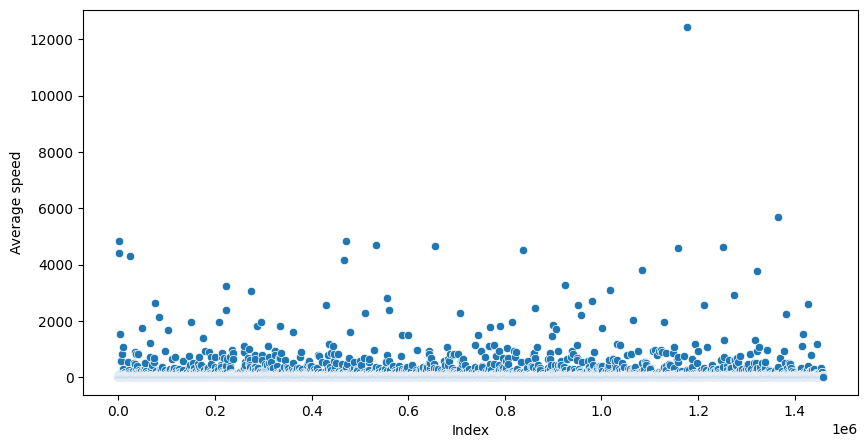

In [14]:
# Строим диаграмму рассеяния средней скорости.
avg_speed = taxi_merge['total_distance'] / taxi_merge['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

In [15]:
# Условимся, что предельная средняя скорость, которую могут развивать таксисты, будет равна 300 км/ч. Всё что выше удалим.
# Условимся, что максимальная длительность поездки составляет 24 часа. Всё что выше удалим.

# Удаление выбросов.
mask_duration = taxi_merge['trip_duration'] <= 86400
mask_speed = (taxi_merge['total_distance'] / taxi_merge['trip_duration'] * 3.6) <= 300
taxi_data = taxi_merge[mask_duration & mask_speed]

print('Количество выбросов по длительности поездки:', taxi_merge[taxi_merge['trip_duration'] > 86400].shape[0])
print('Количество выбросов по значению скорости:', avg_speed[avg_speed > 300].shape[0])

Количество выбросов по длительности поездки: 4
Количество выбросов по значению скорости: 407


## 3. Разведывательный анализ данных

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.

Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.

In [16]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

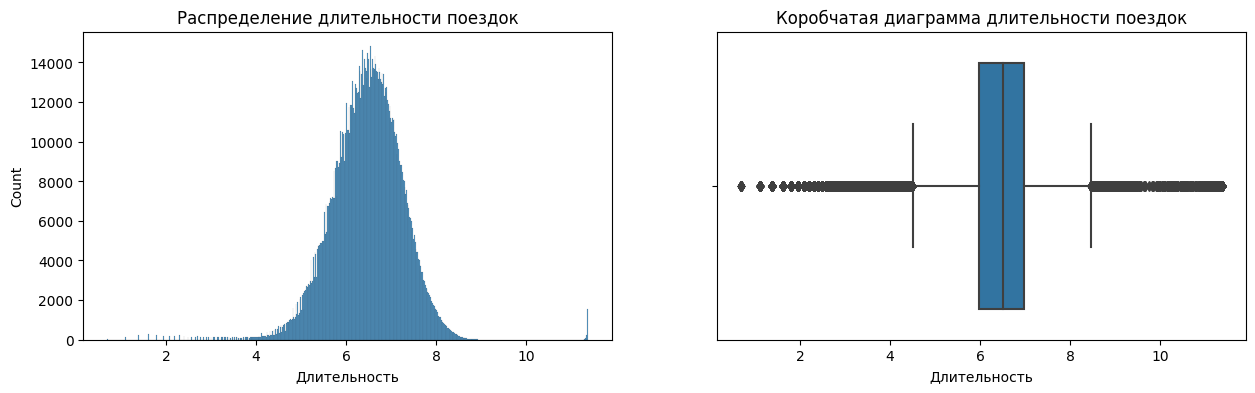

In [17]:
# Визуализация в виде гистограммы и коробчатой диаграммы признака 'trip_duration_log' для выявления выбросов.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# Гистограмма поездок.
histplot = sns.histplot(data=taxi_data, x='trip_duration_log', ax=axes[0]);
histplot.set_title('Распределение длительности поездок');
histplot.set_xlabel('Длительность');

# Коробчатая диаграмма поездок.
boxplot = sns.boxplot(data=taxi_data, x='trip_duration_log', ax=axes[1]);
boxplot.set_title('Коробчатая диаграмма длительности поездок');
boxplot.set_xlabel('Длительность');

Как видно из гистограммы, распределение длительности поездок в логарифмическом масштабе является нормальным.

In [18]:
# Нулевая и альтернативная гипотезы для проверки на нормальность.
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально'

# Уровень значимости.
alpha = 0.05

# Тест Д'Агостино.
_, p = stats.normaltest(taxi_data['trip_duration_log'])
print('p = %.2f' % p)

# Интерпретация.
if p > alpha:
	print(H0)
else:
	print(Ha)

p = 0.00
Данные не распределены нормально


### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

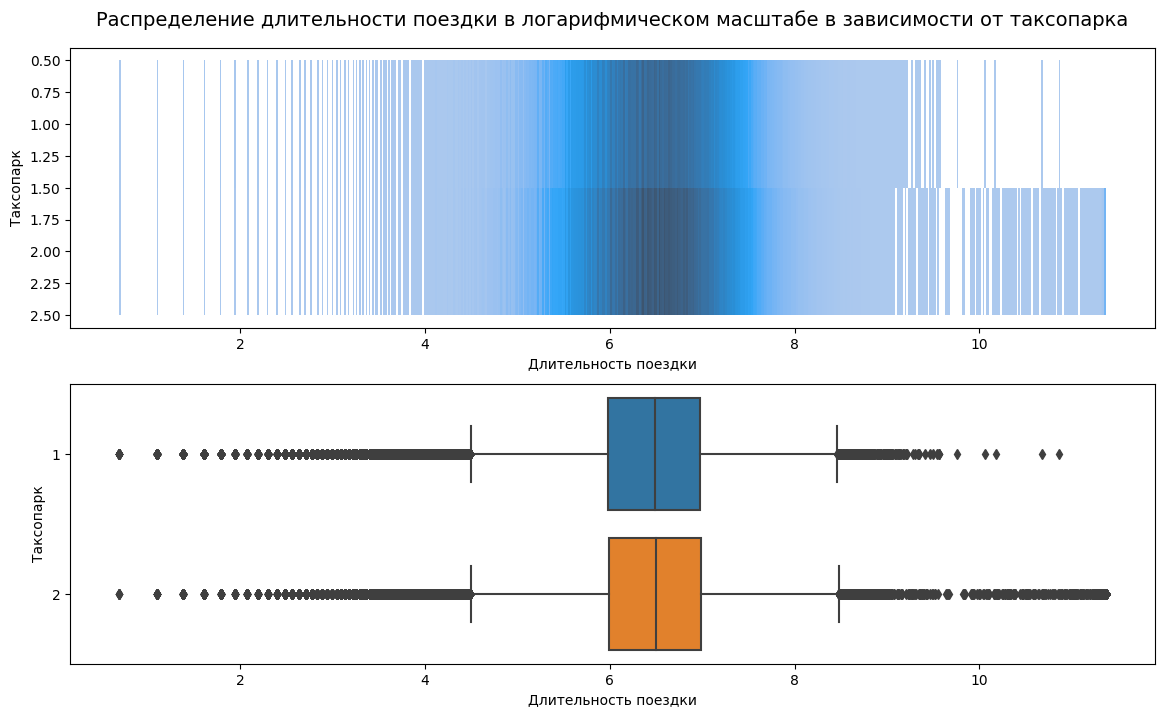

In [19]:
# Для дальнейших расчетов переведем в категориальный признак vendor_id.
taxi_data['vendor_id'] = taxi_data['vendor_id'].astype('category')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))

# Гистограмма зависимости длительности от таксопарка.
histplot = sns.histplot(
    ax=axes[0],
    data=taxi_data,
    x='trip_duration_log',
    y='vendor_id' 
)
histplot.set_title('Распределение длительности поездки в логарифмическом масштабе в зависимости от таксопарка', fontsize=14, x=0.5, y=1.05);
histplot.set_xlabel('Длительность поездки');
histplot.set_ylabel('Таксопарк');

# Коробчатая диаграмма зависимости длительности от таксопарка.
boxplot = sns.boxplot(
    ax=axes[1],
    data=taxi_data,
    x='trip_duration_log',
    y='vendor_id'
);
boxplot.set_xlabel('Длительность поездки');
boxplot.set_ylabel('Таксопарк');

### Выводы
Длительности поездок в обоих таксопарках практически совпадают по всем показателям. Во втором таксопарке немного преобладают более длительные поездки.

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

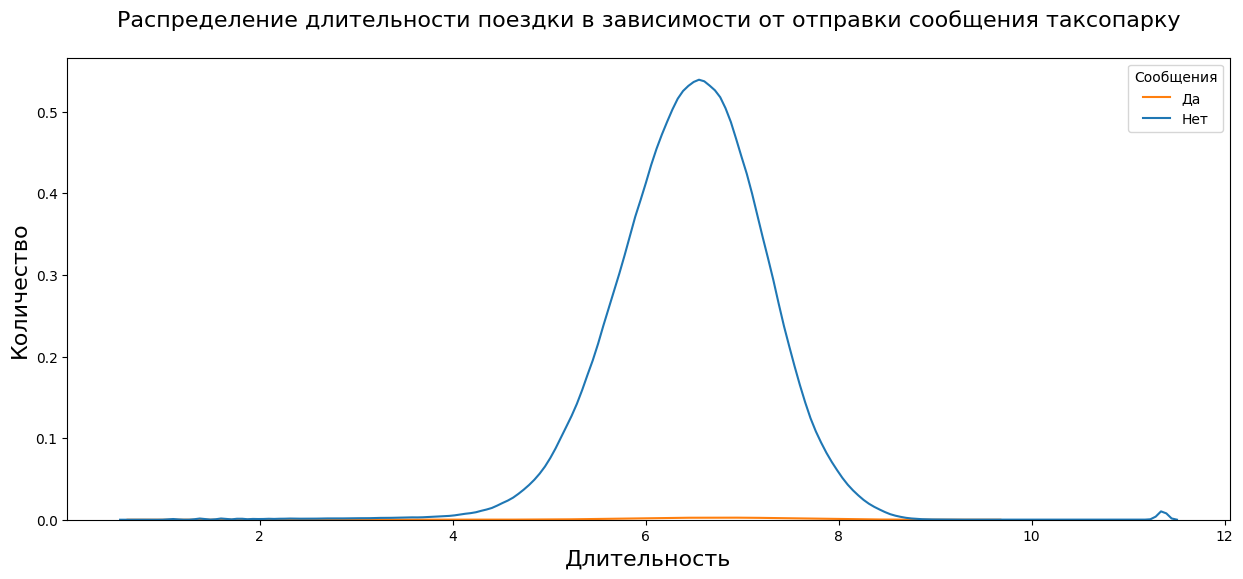

In [20]:
# Для дальнейших расчетов переведем в категориальный признак 'store_and_fwd_flag'.
taxi_data['store_and_fwd_flag'] = taxi_data['store_and_fwd_flag'].astype('category')

# График оценки плотности ядра (KDE)
plt.figure(figsize=(15,6))
sns.kdeplot(
    data=taxi_data,
    x=taxi_data['trip_duration_log'],
    hue='store_and_fwd_flag'
)
plt.title('Распределение длительности поездки в зависимости от отправки сообщения таксопарку', fontsize=16, x=0.5, y=1.05)
plt.xlabel('Длительность', fontsize=16)
plt.ylabel('Количество', fontsize=16)
plt.legend(title='Сообщения', loc='upper right', labels=['Да', 'Нет']);

### Вывод
Распределения в группах значительно отличаются. По количеству поездок больше заказов без отправки сообщений таксопарку.

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

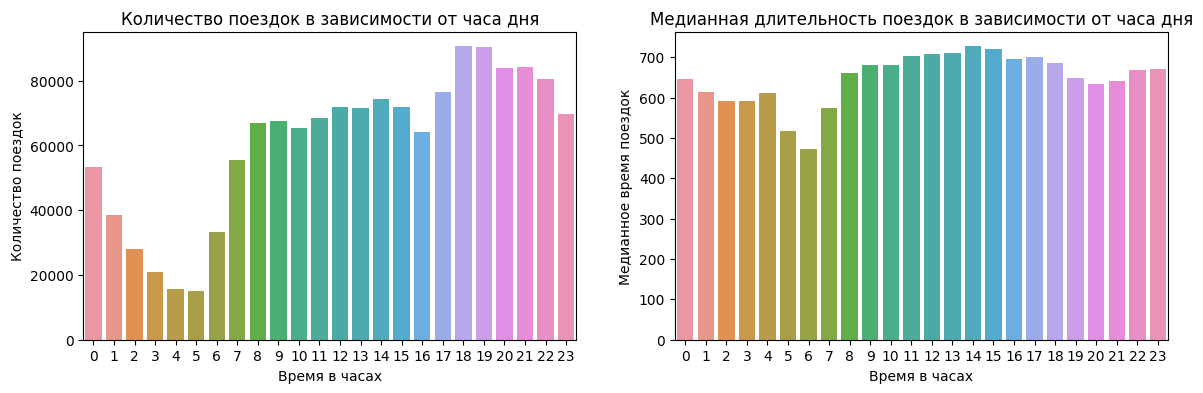

In [21]:
from seaborn import countplot

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# График количества поездок по часам.
count = sns.countplot(
    ax=axes[0],
    data=taxi_data,
    x='pickup_hour'
)
axes[0].set_title('Количество поездок в зависимости от часа дня')
axes[0].set_xlabel('Время в часах')
axes[0].set_ylabel('Количество поездок')

# График длительности поездок по часам.
hour_median = taxi_data.groupby(by='pickup_hour',as_index=False)[['trip_duration']].median()
median = sns.barplot(
    ax=axes[1],
    data=hour_median,
    x='pickup_hour',
    y='trip_duration'
)
axes[1].set_title('Медианная длительность поездок в зависимости от часа дня')
axes[1].set_xlabel('Время в часах')
axes[1].set_ylabel('Медианное время поездок');

Реже всего такси заказывают с 00:00 по 5:00.

Пик медианной длительности поездок наблюдается в интервале с 13:00 по 15:00.

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?

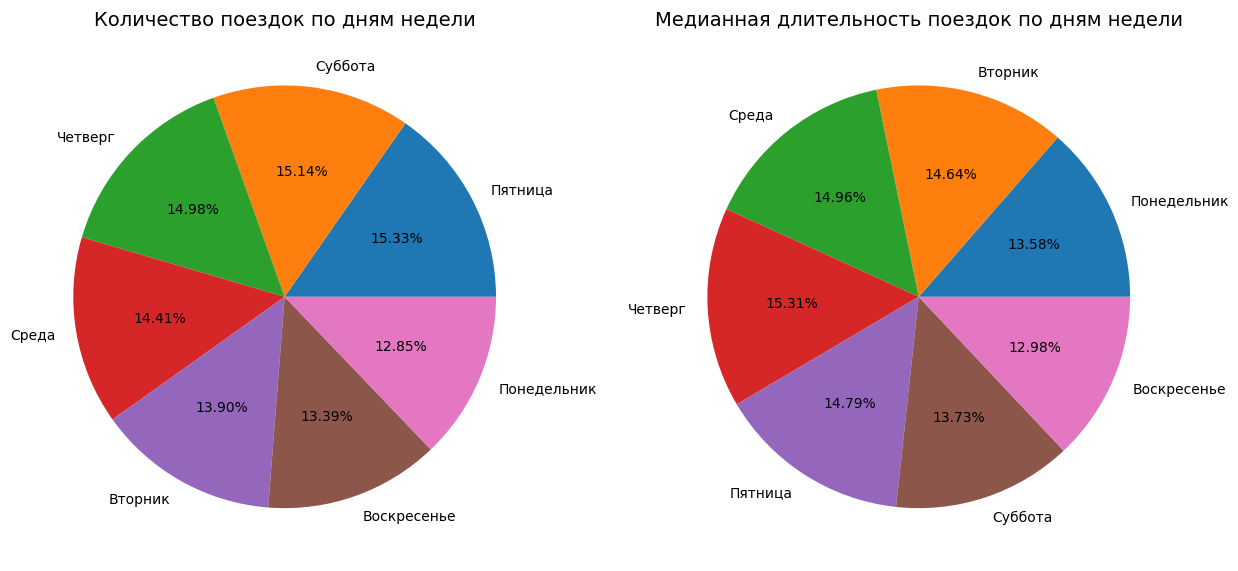

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 12))

# Круговая диаграмма количества поездок по дням недели.
rename_days = {0:'Понедельник', 1:'Вторник', 2:'Среда', 3:'Четверг', 4:'Пятница', 5:'Суббота', 6:'Воскресенье'}
number_of_trips = taxi_data['pickup_day_of_week'].replace(rename_days).value_counts()
axes[0].set_title('Количество поездок по дням недели', fontsize=14),
axes[0].pie(
    number_of_trips,
    labels=number_of_trips.index,
    autopct='%.2f%%',
);
# Круговая диаграмма медианной длительности поездок по дням недели.
duration = taxi_data.groupby('pickup_day_of_week')['trip_duration'].median()
duration = duration.rename(index=rename_days)
labels = list(duration.index)
duration_median = duration.to_list()
axes[1].set_title('Медианная длительность поездок по дням недели', fontsize=14),
axes[1].pie(
    duration_median,
    labels=labels,
    autopct='%.2f%%',
);

### Выводы
Как видно на графиках, в пятницу совершается больше всего поездок. Наименьшая медианная длительность поездок наблюдается в воскресенье.

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

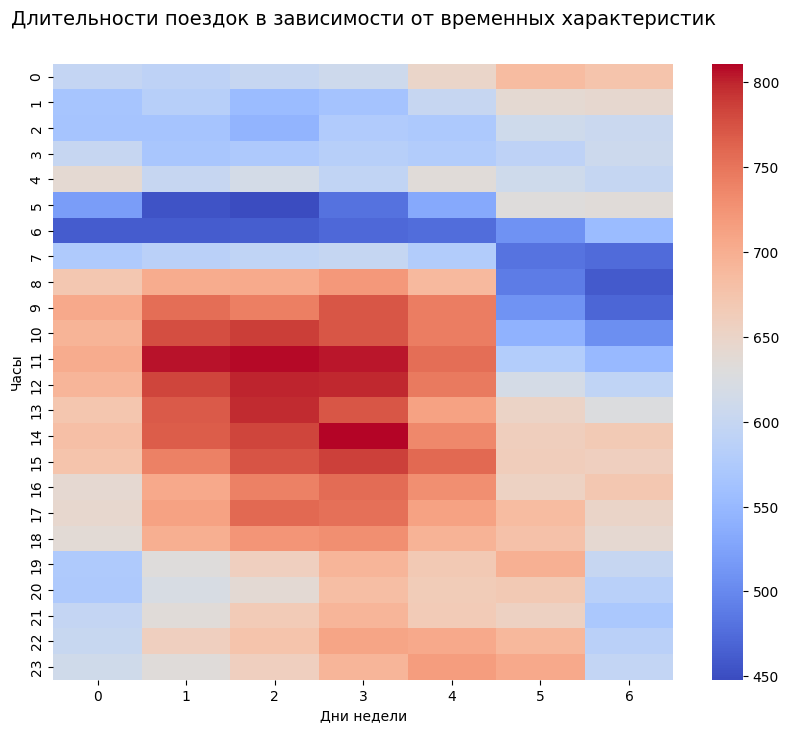

In [23]:
# Сводная таблица по длительности поездок.
pivot_table = taxi_data.pivot_table(
    values='trip_duration',
    index='pickup_hour',
    columns='pickup_day_of_week',
    aggfunc='median',
)
# Тепловая карта значений.
fig = plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data=pivot_table, cmap='coolwarm')
heatmap.set_title('Длительности поездок в зависимости от временных характеристик', fontsize=14, x=0.5, y=1.05);
heatmap.set_xlabel('Дни недели');
heatmap.set_ylabel('Часы');

### Выводы
Наиболее продолжительные поездки наблюдаются с понедельника по пятницу с 8 до 18 часов. Еще можно увидеть, что наибольшая медианная длительность поездок наблюдается в четверг в 14 часов.

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  

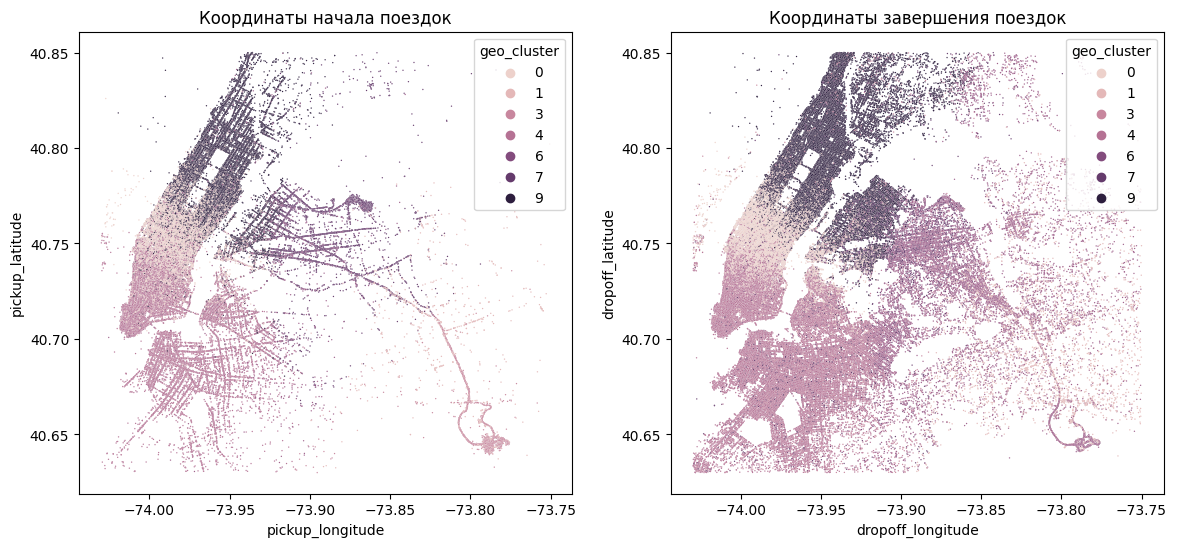

In [24]:
# Ограничения
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# Маски ограничений.
mask_long_border1 = (taxi_data['pickup_longitude'] >= -74.03) & (taxi_data['pickup_longitude'] <= -73.75)
mask_lat_border1 = (taxi_data['pickup_latitude'] >= 40.63) & (taxi_data['pickup_latitude'] <= 40.85)
mask_long_border2 = (taxi_data['dropoff_longitude'] >= -74.03) & (taxi_data['dropoff_longitude'] <= -73.75)
mask_lat_border2 = (taxi_data['dropoff_latitude'] >= 40.63) & (taxi_data['dropoff_latitude'] <= 40.85)

# Применение масок
taxi_data_limited = taxi_data[mask_long_border1 & mask_lat_border1 & mask_long_border2 & mask_lat_border2]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Диаграмма рассеяния координат начала поездки.
scatter_start = sns.scatterplot(
    ax=axes[0],
    data=taxi_data_limited,
    x='pickup_longitude',
    y='pickup_latitude',
    hue='geo_cluster',
    s=1
)
scatter_start.set_title('Координаты начала поездок')

# Диаграмма рассеяния координат конца поездки.
scatter_end = sns.scatterplot(
    ax=axes[1],
    data=taxi_data_limited,
    x='dropoff_longitude',
    y='dropoff_latitude',
    hue='geo_cluster',
    s=1   
)
scatter_end.set_title('Координаты завершения поездок');

### Выводы

3 кластера из десяти не попали на диаграммы. Значит они находятся за границами Нью-Йорка.

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.

In [25]:
# Поссмотрим на размерность и признаки получившегося ранее датасета.
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


In [26]:
# Для удобства работы сделаем копию исходной таблицы с поездками:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?

### Решение

а) признак 'id' - уникальный идентификатор поездки не несет полезной информации, так как является уникальным для каждой поездки.

б) ситуация, в которой данные используемые для обучения модели, содержат прямую или косвенную информацию о целевой переменной, но эти данные недоступны в реальных условиях.

в) утечку данных создает признак 'dropoff_datetime' - дата и время, когда счетчик был отключен. В реальной ситуации заранее неизвестно, когда приедет такси и этот признак косвенно связан с продолжительностью поездки. Поэтому он создает утечку данных.

г) исключим указанные признаки из таблицы.

In [27]:
train_data = train_data.drop(['id', 'dropoff_datetime'], axis = 1)
print('Количество признаков, оставшихся в данных:', train_data.shape[1])

Количество признаков, оставшихся в данных: 25


In [28]:
# Ранее мы извлекли всю необходимую информацию из даты начала поездки. Теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:

drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.
Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение "N", и 0 в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.

In [29]:
# Закодируем признак vendor_id.
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
train_data['vendor_id'] = train_data['vendor_id'].astype('int')

# Закодируем признак store_and_fwd_flag.
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].astype('int')

print('Среднее значение по столбцу vendor_id:', round(train_data['vendor_id'].mean(), 2))
print('Среднее значение по столбцу store_and_fwd_flag:', round(train_data['store_and_fwd_flag'].mean(), 3))

Среднее значение по столбцу vendor_id: 0.53
Среднее значение по столбцу store_and_fwd_flag: 0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEndoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?

In [30]:
# Кодировщик.
one_hot_encoder = preprocessing.OneHotEncoder(drop='first')

# Список признаков для кодирования.
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']

# Производим обучение и кодировку указанных выше признаков.
data_onehot = one_hot_encoder.fit_transform(train_data[columns_to_change]).toarray()

# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()

# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns = column_names)

print('Количество сгенерированных бинарных признаков:', data_onehot.shape[1])

Количество сгенерированных бинарных признаков: 18


In [31]:
# Добавим полученную таблицу с закодированными признаками:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)

Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:

In [32]:
# Вектор наблюдений.
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
# Целевой признак.
y = train_data['trip_duration']
# Логарифм целевого признака.
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [33]:
# Разобьем выборку на обучающую и валидационную в соотношении 67/33:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

Примечание. Тестовая выборка, с которой мы познакомимся позднее, представлена отдельным датасетом. Истинные длительности поездок из тестового набора являются для нас неизвестными, и финальное качество модели можно узнать, только сделав предсказание и отправив файл с предсказанием на проверку на платформе Kaggle.

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.

### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных

In [34]:
# Отбор признаков.
selector_best = feature_selection.SelectKBest(score_func = feature_selection.f_regression, k = 25)

# 25 признаков, вошедшие в список отобранных.
selector_best.fit(X_train, y_train_log)
best_features = selector_best.get_feature_names_out()
X_train = X_train[best_features]
X_valid = X_valid[best_features]
print('Признаки, которые вошли в список отобранных:', best_features)

Признаки, которые вошли в список отобранных: ['vendor_id' 'passenger_count' 'pickup_longitude' 'pickup_latitude'
 'dropoff_longitude' 'dropoff_latitude' 'store_and_fwd_flag' 'pickup_hour'
 'pickup_holiday' 'total_distance' 'total_travel_time' 'number_of_steps'
 'haversine_distance' 'temperature' 'pickup_day_of_week_1'
 'pickup_day_of_week_2' 'pickup_day_of_week_3' 'pickup_day_of_week_4'
 'pickup_day_of_week_5' 'pickup_day_of_week_6' 'geo_cluster_1'
 'geo_cluster_3' 'geo_cluster_5' 'geo_cluster_7' 'geo_cluster_9']


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 

### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.

Примечание. Есть разные варианты масштабирования. Мы будем использовать min-max-нормализацию. Помните, что нормализация требуется для предикторов, а не для целевой переменной.

In [35]:
# Нормализатор MinMaxScaler.
mm_scaler = preprocessing.MinMaxScaler()

# Нормализация данных.
X_train = mm_scaler.fit_transform(X_train)
X_valid = mm_scaler.transform(X_valid)

# Обратно преобразуем в DataFrame полученные массивы после нормализации.
X_train = pd.DataFrame(X_train, columns = best_features)
X_valid = pd.DataFrame(X_valid, columns = best_features)

# Среднее арифметическое.
mean_1 = X_valid['vendor_id'].mean()
print('Среднее арифметическое первого предиктора из валидационной выборки:', np.round(mean_1, 2))

Среднее арифметическое первого предиктора из валидационной выборки: 0.54


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$

### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

In [36]:
# Инициализируем LinearRegression.
lin_reg_model = linear_model.LinearRegression()

# Обучаем модель линейной регрессии.
lin_reg_model.fit(X_train, y_train_log)

# Делаем предсказания.
y_train_pred = lin_reg_model.predict(X_train)
y_valid_pred = lin_reg_model.predict(X_valid)

# Метрика MSE и квадратный корень из него как RMSLE.
mse_train = metrics.mean_squared_error(y_train_log, y_train_pred)
rmsle_train = np.sqrt(mse_train)
print('RMSLE на тренировочной выборке:', round(rmsle_train, 2))

mse_valid = metrics.mean_squared_error(y_valid_log, y_valid_pred)
rmsle_valid = np.sqrt(mse_valid)
print('RMSLE на валидационной выборке:', round(rmsle_valid, 2))

RMSLE на тренировочной выборке: 0.54
RMSLE на валидационной выборке: 0.54


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?

In [37]:
# Создаём генератор полиномиальных признаков.
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)

# Генерируем полиномиальные признаки для тренировочной и тестовой выборок.
X_train_poly = poly.transform(X_train)
X_valid_poly = poly.transform(X_valid)

# Инициализируем и обучаем полиномиальную регрессию.
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_poly, y_train_log)

# Предсказания полиномиальной регрессии.
y_train_pred = lr_poly.predict(X_train_poly)
y_valid_pred = lr_poly.predict(X_valid_poly)

# Метрики RMSLE.
print('RMSLE на тренировочной выборке:', round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)), 2))
print('RMSLE на валидационной выборке:', round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)), 2))

RMSLE на тренировочной выборке: 0.47
RMSLE на валидационной выборке: 0.7


### Вывод
Так как на тренировочной выборке ошибка модели меньше чем на валидационной, то это значит, что модель переобучена.

### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

In [38]:
# Создаём объект класса линейной регрессии с L2-регуляризацией.
ridge_lr_poly = linear_model.Ridge(alpha=1)

# Обучаем модель.
ridge_lr_poly.fit(X_train_poly, y_train_log)

# Рредсказания.
y_train_pred = ridge_lr_poly.predict(X_train_poly)
y_valid_pred = ridge_lr_poly.predict(X_valid_poly)

# Метрики RMSLE.
print('RMSLE на тренировочной выборке:', round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)), 2))
print('RMSLE на валидационной выборке:', round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)), 2))

RMSLE на тренировочной выборке: 0.48
RMSLE на валидационной выборке: 0.48


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?

In [39]:
# Создаем и обучаем модель дерева решений.
dt_reg = tree.DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train_log)

# Предсказания модели.
y_train_pred = dt_reg.predict(X_train)
y_valid_pred = dt_reg.predict(X_valid)

# Метрики RMSLE.
print('RMSLE на тренировочной выборке:', round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)), 2))
print('RMSLE на валидационной выборке:', round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)), 2))

RMSLE на тренировочной выборке: 0.0
RMSLE на валидационной выборке: 0.57


### Вывод
По полученным метрикам можно увидеть, что модель идеально подстроилась под обучающую выборку и метрика RMSLE равна нулю. Это говорит, что модель максимально переобучена.

### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.

Оптимальная глубина дерева решений: 11
RMSLE на тренировочной выборке: 0.41
RMSLE на валидационной выборке: 0.43


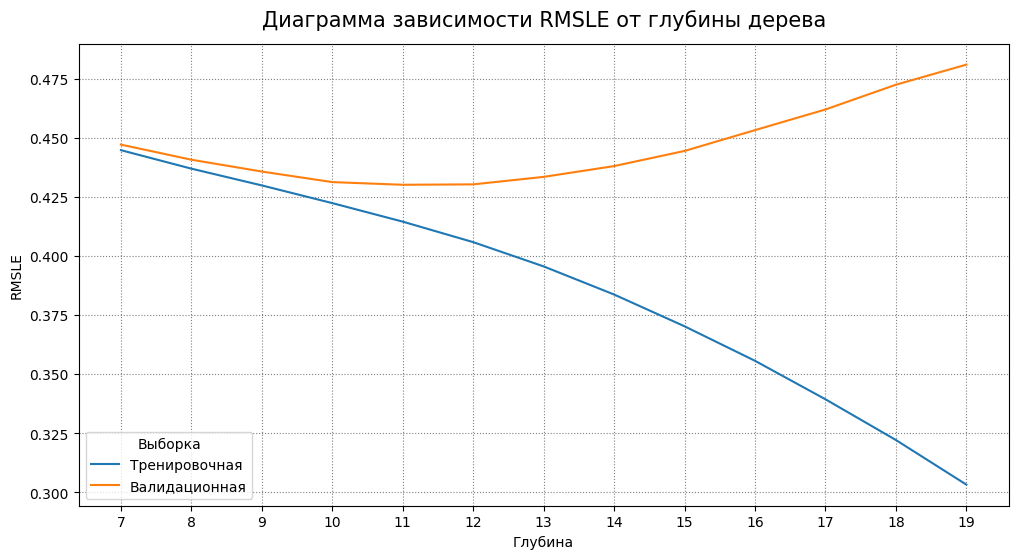

In [40]:
# Создаём список значений глубины от 7 до 20.
max_depths = range(7, 20)

# Создаем пустые списки, в которые будем добавлять результаты RMSLE.
train_scores = []
valid_scores = []

for depth in max_depths:
    # Создаем и обучаем модель дерева решений.
    dt_reg = tree.DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt_reg.fit(X_train, y_train_log)
    # Делаем предсказание для тренировочной и валидационной выборок.
    y_train_pred = dt_reg.predict(X_train)
    y_valid_pred = dt_reg.predict(X_valid)
    # Расчитываем метрики RMSLE и добавляем их в списки.
    train_scores.append(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)))
    valid_scores.append(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)))

# Диаграмма зависимости RMSLE от глубины дерева.
fig, ax = plt.subplots(figsize = (12, 6))
# Линейные графики тренировочной и валидационной выборок.
ax.plot(max_depths, train_scores)
ax.plot(max_depths, valid_scores)
ax.grid(alpha=0.5, color='black', linestyle=':')
ax.legend(title='Выборка', loc='lower left', labels=['Тренировочная', 'Валидационная']);
ax.set_title('Диаграмма зависимости RMSLE от глубины дерева', fontsize=15, x=0.5, y=1.02);
ax.set_xlabel('Глубина')
ax.set_ylabel('RMSLE')
ax.set_xticks(max_depths)

# Находим индекс наименьшего значения RMSLE на валидационных данных.
rmsle_min = valid_scores.index(min(valid_scores))
# Извлекаем по индексу из max_depths наименьшее значение RMSLE.
print('Оптимальная глубина дерева решений:', max_depths[rmsle_min])
# Извлекаем в тренировочных и валидационных списках ранее найденные метрики RMSLE по найденному индексу.
print('RMSLE на тренировочной выборке:', round(train_scores[rmsle_min], 2))
print('RMSLE на валидационной выборке:', round(valid_scores[rmsle_min], 2))

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

In [41]:
# Создаём объект класса RandomForestRegressor.
rf_reg = ensemble.RandomForestRegressor(
    n_estimators = 200,
    max_depth = 12,
    criterion = 'squared_error',
    min_samples_split = 20,
    random_state = 42,
    n_jobs = -1
)
# Обучение модели.
rf_reg.fit(X_train, y_train_log)

# Предсказания модели.
y_train_pred = rf_reg.predict(X_train)
y_valid_pred = rf_reg.predict(X_valid)

# Метрики RMSLE.
print('RMSLE на тренировочной выборке:', round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)), 2))
print('RMSLE на валидационной выборке:', round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)), 2))

RMSLE на тренировочной выборке: 0.4
RMSLE на валидационной выборке: 0.41


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

In [42]:
# Создаём объект класса GradientBoostingRegressor.
gb_reg = ensemble.GradientBoostingRegressor(
    learning_rate = 0.5,
    n_estimators = 100,
    max_depth = 6,
    min_samples_split = 30,
    random_state = 42
)
# Обучение модели.
gb_reg.fit(X_train, y_train_log)

# Предсказания модели
y_train_pred = gb_reg.predict(X_train)
y_valid_pred = gb_reg.predict(X_valid)

# Метрики RMSLE.
print('RMSLE на тренировочной выборке:', round(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred)), 2))
print('RMSLE на валидационной выборке:', round(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred)), 2))

RMSLE на тренировочной выборке: 0.37
RMSLE на валидационной выборке: 0.39


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений

### Ответ на задание
Наименьшее значение по метрике RMSLE на валидационной выборке показала модель градиентного бустинга над деревьями решений.

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.

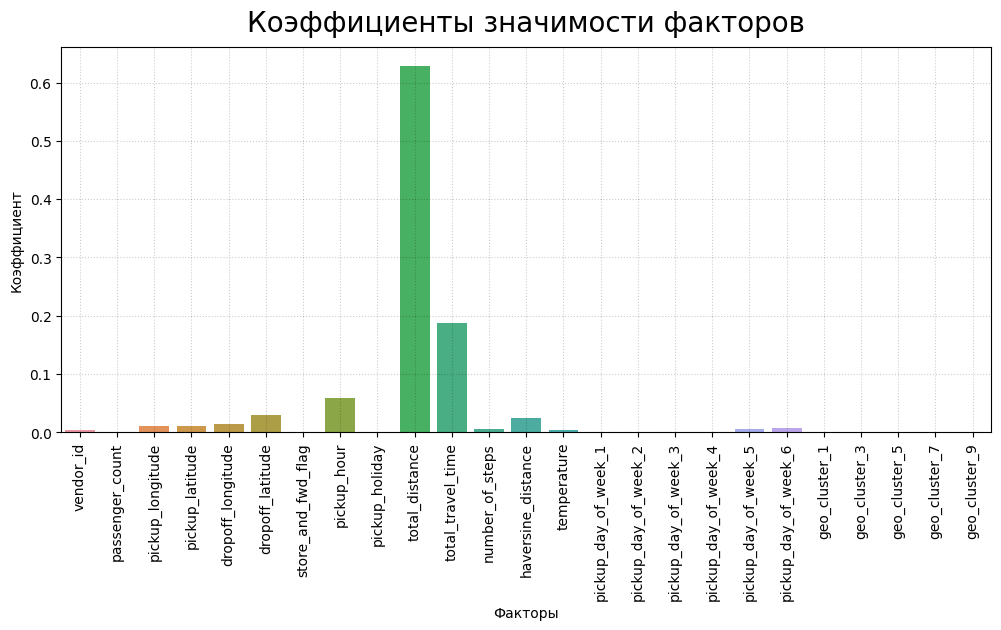

In [43]:
# Извлекаем важность признаков с названиями.
importances = gb_reg.feature_importances_
features = X_train.columns

# Столбчатая диаграмма.
fig, ax = plt.subplots(figsize = (12, 5))
sns.barplot(
    x=features, 
    y=importances, 
    ax=ax
)
ax.grid(alpha=0.2, color='black', linestyle=':')
ax.set_title('Коэффициенты значимости факторов', fontsize=20, y=1.02)
ax.set_ylabel('Коэффициент')   
ax.set_xlabel('Факторы')   
ax.xaxis.set_tick_params(rotation = 90)

### Вывод
Как видно из графика, наиболее важными признаками являются **total_distance**, **total_travel_time** и **pickup_hour**.

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.

In [44]:
# Преобразуем логарифимический масштаб в изначальный.
original_y_valid = np.exp(y_valid_log) - 1
original_y_valid_pred = np.exp(y_valid_pred) - 1

# Медианная абсолютная ошибка.
meae_valid = metrics.median_absolute_error(original_y_valid, original_y_valid_pred)

# MeAE в минутах.
print('MeAE на валидационной выборке в минутах:', round(meae_valid/60, 1))

MeAE на валидационной выборке в минутах: 1.8


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных.

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:

In [45]:
test_data = pd.read_csv("data/test.csv")
osrm_data_test = pd.read_csv("data/osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.

In [46]:
# Производим те же самые действия, что и ранее, но для тестовой выборки.
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')

# Применяем ранее созданные функции.
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data (test_data)

# Кодирование.
test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

# Объединение таблиц.
test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = mm_scaler.transform(X_test)

# Предсказание для тестовой выборки.
y_test_pred_log = gb_reg.predict(X_test_scaled)

# Преобразуем предсказания из логарифмического маштаба в истинный.
y_test_predict = np.exp(y_test_pred_log) - 1

# Создаем submission-файл.
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [47]:
import xgboost as xgb

# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:

In [48]:
# Гиперпараметры модели.
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка.
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost.
model = xgb.train(
    params=xgb_pars, # гиперпараметры модели
    dtrain=dtrain, # обучающая выборка
    num_boost_round=300, # количество моделей в ансамбле
    evals=watchlist, # выборки, на которых считается матрица
    early_stopping_rounds=20, # раняя остановка
    maximize=False, # смена поиска максимума на минимум
    verbose_eval=10 # шаг, через который происходит отображение метрик
)

[0]	train-rmse:5.42218	valid-rmse:5.42190
[10]	train-rmse:1.93577	valid-rmse:1.93572
[20]	train-rmse:0.78516	valid-rmse:0.78602
[30]	train-rmse:0.47918	valid-rmse:0.48121
[40]	train-rmse:0.42142	valid-rmse:0.42405
[50]	train-rmse:0.40929	valid-rmse:0.41237
[60]	train-rmse:0.40478	valid-rmse:0.40826
[70]	train-rmse:0.40168	valid-rmse:0.40561
[80]	train-rmse:0.39942	valid-rmse:0.40364
[90]	train-rmse:0.39752	valid-rmse:0.40209
[100]	train-rmse:0.39572	valid-rmse:0.40058
[110]	train-rmse:0.39410	valid-rmse:0.39932
[120]	train-rmse:0.39331	valid-rmse:0.39879
[130]	train-rmse:0.39201	valid-rmse:0.39783
[140]	train-rmse:0.39096	valid-rmse:0.39711
[150]	train-rmse:0.38999	valid-rmse:0.39655
[160]	train-rmse:0.38924	valid-rmse:0.39606
[170]	train-rmse:0.38852	valid-rmse:0.39567
[180]	train-rmse:0.38786	valid-rmse:0.39524
[190]	train-rmse:0.38716	valid-rmse:0.39492
[200]	train-rmse:0.38645	valid-rmse:0.39447
[210]	train-rmse:0.38563	valid-rmse:0.39400
[220]	train-rmse:0.38505	valid-rmse:0.39372

In [49]:
# Делаем предсказание на тестовом наборе данных с помощью метода predict().
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.39163


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важности факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():

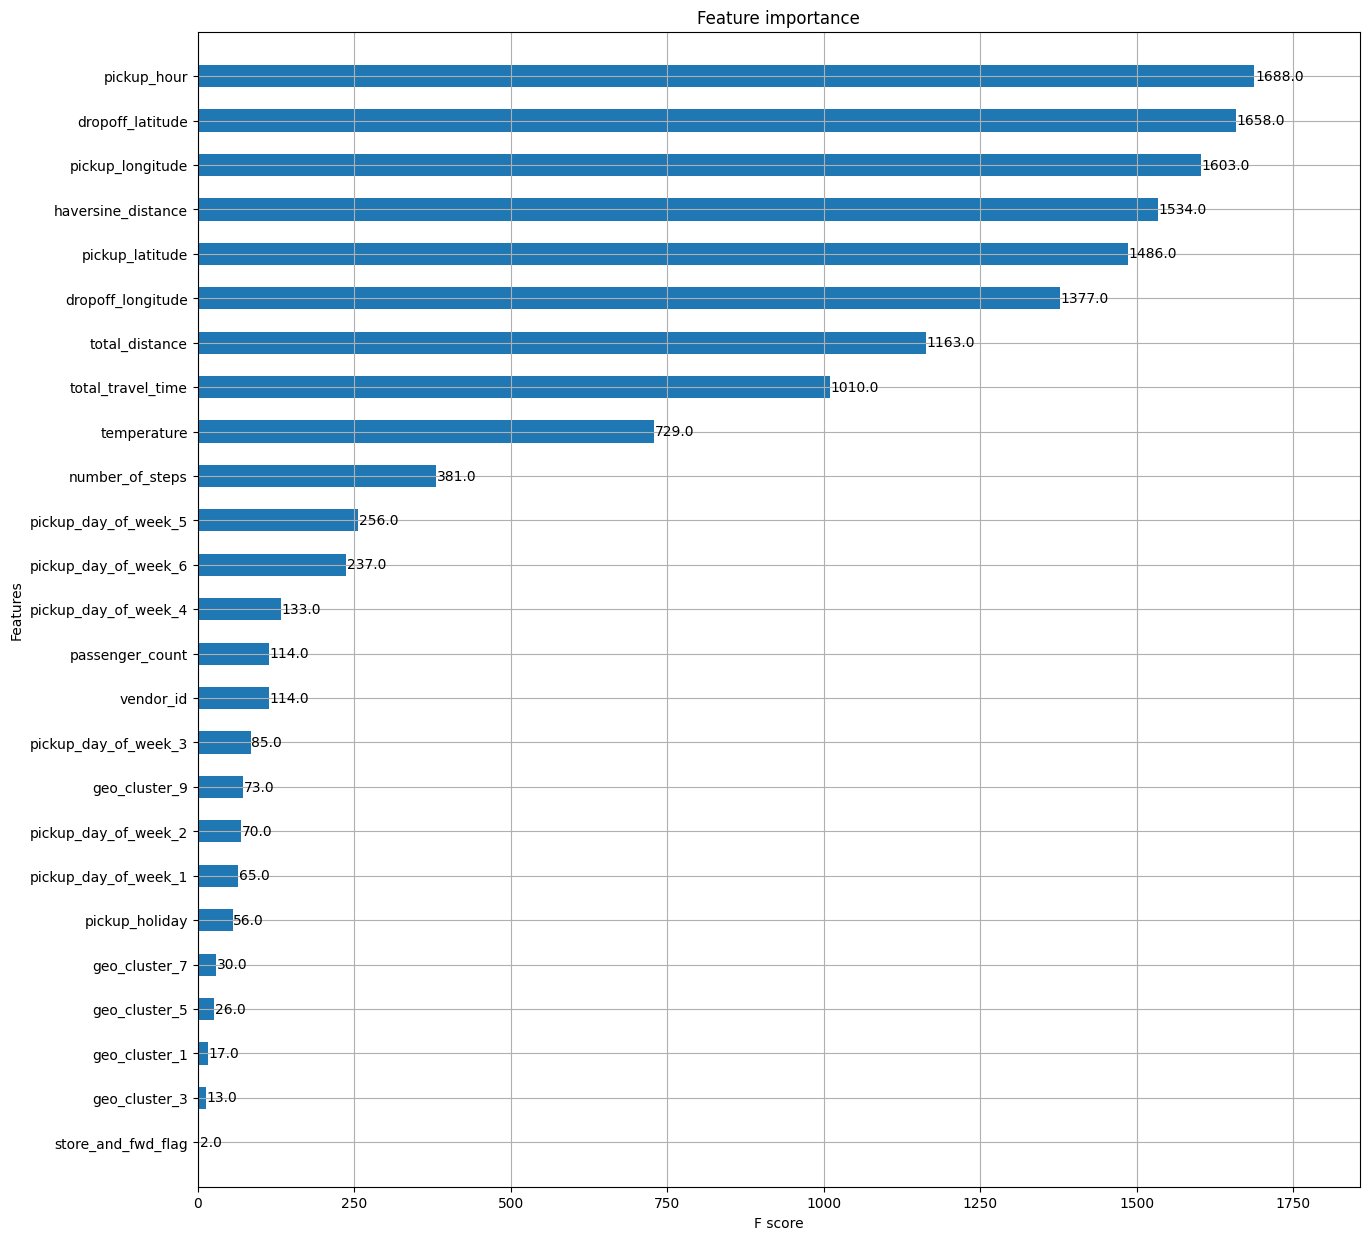

In [50]:
# Визуализация важности факторов в виде столбчатой диаграммы при помощи функции plot_importance():
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5);